In [3]:
import numpy as np
from numpy.random import randint, rand, randn, choice
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.spatial import KDTree
from sir.agent_pop2d import Population2d

In [2]:
def plot_lines(ax, df, label,cmap, start=0.2, end=1):
    """
    plot simulated result with various value of f
    input
        df: shape (len(fs),T), every row is, e.g. i(t), for certain f
        cmap: an plt.cm colormap object, see https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
        start, end: scale location in color map
    """
    cols = [cmap(x) for x in np.linspace(start, end, len(df))]
    for i, col in enumerate(cols):
        ax.plot(df[i,:], c=col, label = label[i])
    # ax.set_xlabel('Time')
    # ax.set_ylabel('Fraction')
    return ax

In [4]:
import math
N=1000
I = 10
T = 50
b = 7
k = 0.1
q = math.sqrt(b/(math.pi*N))

In [8]:
results = np.zeros((len(ps),T+1,3))
ps = np.arange(0, 1, 0.2)
for i, p in enumerate(ps):
    pop = pop = Population2d(N,I)
    counts_sir = pop.simulation(T, p, q=q, k=0.1)[0] # shape = (T+1,3), columns are S, I, R
    results[i,...] = counts_sir / N # convert to fractions, store in results

<ipython-input-9-03e9105124f4>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


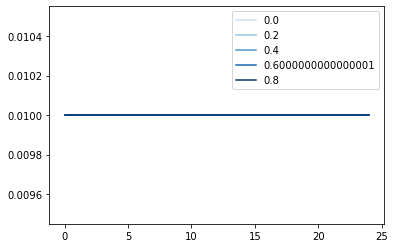

In [9]:
fig, ax = plt.subplots(1,1, sharex='all', sharey='all')
ax = plot_lines(ax, results[:,:25,1], ps,mpl.cm.Blues)
ax.legend()
fig.show()

In [10]:
ps = np.round(np.arange(0,0.8,0.1),1)

In [11]:
results = np.zeros((len(ps),T+1,3))
for i, p in enumerate(ps):
    pop = pop = Population2d(N,I)
    counts_sir = pop.simulation(T, p, q=q, k=0.1) # shape = (T+1,3), columns are S, I, R
    results[i,...] = counts_sir / N # convert to fractions, store in results

<ipython-input-13-0ea93448ffcd>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


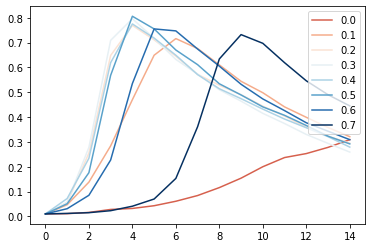

In [13]:
fig, ax = plt.subplots(1,1, sharex='all', sharey='all')
ax = plot_lines(ax, results[:,:15,1],ps,mpl.cm.RdBu)
ax.legend(loc = 1)
fig.show()
#fig.savefig("output/agent_2d_sir.png")

In [113]:
np.max(results[3,:,1])

0.791

In [114]:
np.max(results[4,:,1])

0.804

In [4]:
p = 0.4
loc = ['center','corner']
loc.extend(['random']*5)

In [22]:
results2 = np.zeros((len(loc),T+1,3))
for i, l in enumerate(loc):
    pop = Population2d(N,I,l)
    counts_sir = pop.simulation(T,p=p, q=q,k=0.1) # shape = (T+1,3), columns are S, I, R
    results2[i,...] = counts_sir / N # convert to fractions, store in results

<ipython-input-32-aacbf70a7f84>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


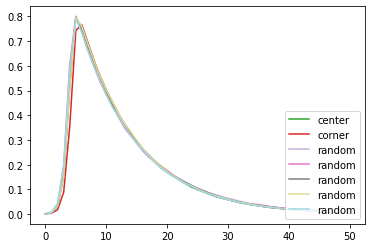

In [32]:
fig, ax = plt.subplots(1,1, sharex='all', sharey='all')
ax = plot_lines(ax, results2[:,:,1],loc,mpl.cm.tab20)
ax.legend(loc = 4)
fig.show()

In [18]:
N=10000
I = 10
T = 50
b = 7
k = 0.1
q = math.sqrt(b/(math.pi*N))

In [ ]:
pop_corner = Population2d(N,I,'corner')
pop_corner.simulation(10,p=p, q=q,k=0.1,plot_time_interval=2)
pop_corner = Population2d(N,I,'corner')
pop_corner.simulation(10,p=0.1, q=q,k=0.1,plot_time_interval=2)

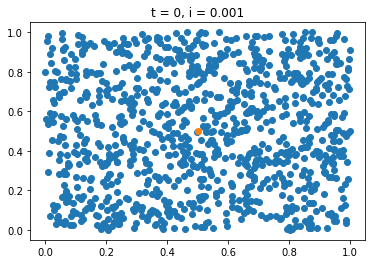

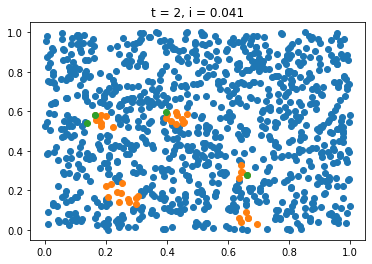

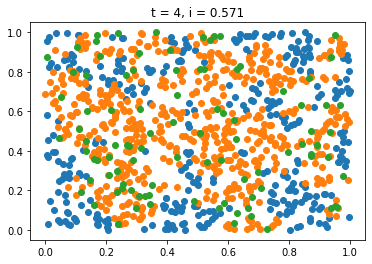

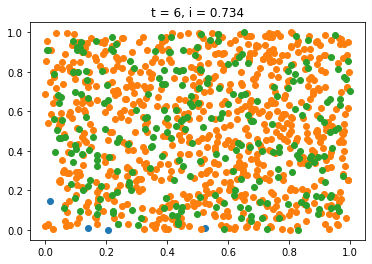

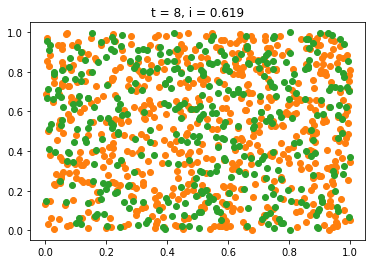

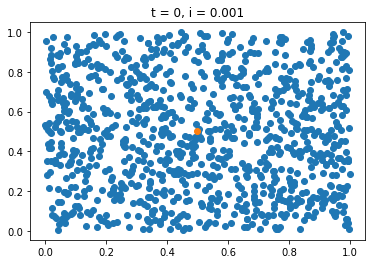

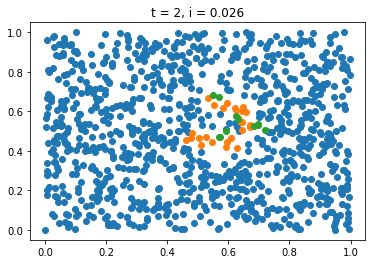

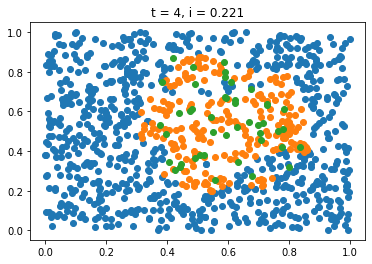

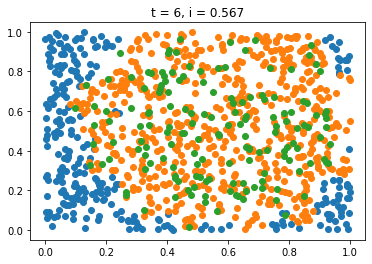

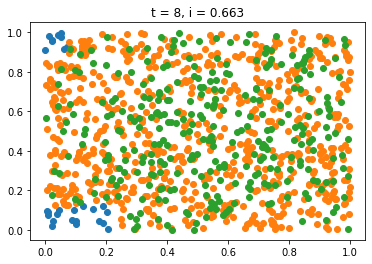

array([[999,   1,   0],
       [990,   8,   2],
       [963,  26,  11],
       [890,  86,  24],
       [734, 221,  45],
       [503, 401,  96],
       [275, 567, 158],
       [111, 653, 236],
       [ 27, 663, 310],
       [  0, 620, 380],
       [  0, 559, 441]])

In [15]:
pop_center = Population2d(N,I,'center')
pop_center.simulation(10,p=p, q=q,k=0.1,plot_time_interval=2)
pop_corner = Population2d(N,I,'center')
pop_corner.simulation(10,p=0.1, q=q,k=0.1,plot_time_interval=2)

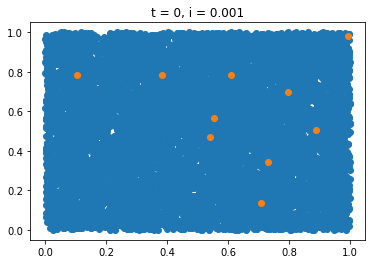

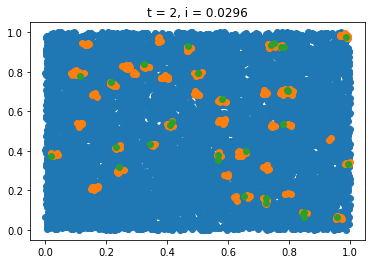

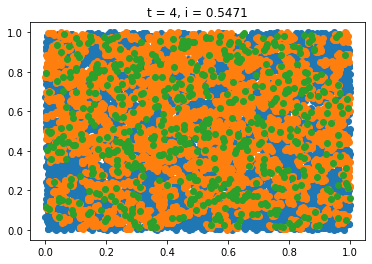

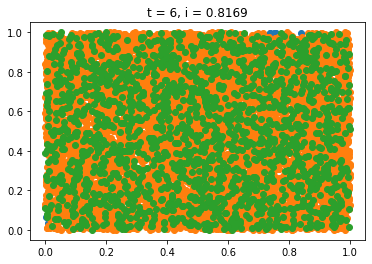

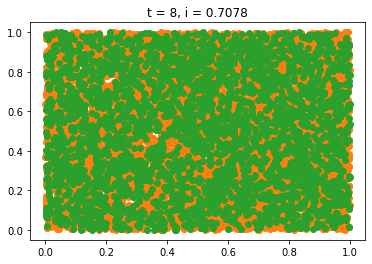

array([[9990,   10,    0],
       [9937,   58,    5],
       [9673,  296,   31],
       [8328, 1522,  150],
       [3950, 5471,  579],
       [ 362, 8410, 1228],
       [  14, 8169, 1817],
       [   0, 7585, 2415],
       [   0, 7078, 2922],
       [   0, 6579, 3421],
       [   0, 6091, 3909]])

In [22]:
pop_random = Population2d(N,I,'random')
pop_random.simulation(10,p=p, q=q,k=0.07,plot_time_interval=2)
#pop_random = Population2d(N,I,'random')
#pop_random.simulation(10,p=0.1, q=q,k=0.1,plot_time_interval=2)